# Проведение исследовательского анализа рынка заведений общественного питания (г. Москва)

- Автор: Логинов Павел Александрович
- Дата: 18.02.2025

## Введение

### Цели и задачи проекта

**Цель проекта**: проведение исследовательского анализа рынка заведений общественного питания для выбора подходящего заведения общественного питания (г.Москва)

**Задачи проекта**:

- Изучить данные
- Провести преобработку данных
- Провести исследовательский анализ данных:
    - Исследовать количество объектов общественного питания по каждой категории заведений
    - Исследовать распределение количества заведений по административным районам Москвы и в разерезе каждой категории в Центральном административном округе Москвы
    - Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения
    - Исследовать количество посадочных мест в заведениях
    - Исследовать рейтинг заведений
    - Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений
    - Исследовать топ-15 популярных сетей в Москве
    - Изучить вариацию среднего чека заведения в зависимости от района Москвы

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽» и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных

- 3.1. Задача 1
- 3.2. Задача 2
- 3.3. Задача 3
- 3.4. Задача 4
- 3.5. Задача 5
- 3.6. Задача 6
- 3.7. Задача 7
- 3.8. Задача 8

4. Итоговый вывод и рекомендации
---

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать *pandas* и библиотеки визуализации данных *matplotlib* и *seaborn*, а также *phik* для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
try:
    rest_info_df = pd.read_csv('C:/Users/Student/Desktop/rest_info.csv')
    rest_price_df = pd.read_csv('C:/Users/Student/Desktop/rest_price.csv')
except:
    rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
    rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к единому виду
- Все представленные данные хранятся в типах данных `object` (строковые данные), `int64` (целочисленные значения) или `float64` (числовые значения с плавающей точкой).

- **Строковые данные (object).** 6 столбцов имеют тип данных `object`:

    - `id` содержит строковую информацию об идентификационном номере заведения
    - `name` содержит строковую информацию о названии заведения
    - `category` содержит строковую информацию о категории заведения
    - `address` содержит строковую информацию об адресе заведения
    - `district` содержит строковую информацию об административном районе, в котором находится заведение
    - `hours` содержит строковую информацию о днях и часах работы

Для данных столбцов верно подобран строковый тип данных, поскольку отображается текстовая информация, которая не может быть представлена в числовом формате

- **Числовые значения с плавающей точкой (float64).** 2 столбца имеют тип данных `float64`:

    - `rating` содержит информацию о рейтинге заведения по оценкам пользователей в Яндекс Картах
    - `seats` содержит информацию о количестве посадочных мест

Для столбца `rating` верно подобран числовой тип данных с плавающей точкой, поскольку оценка - это число, которое может выглядеть и как целое, и как дробное число. Однако тип данных столбца `seats` можно изменить на целочисленный тип данных `int64`, поскольку посадочные места не могут быть представлены в виде дробного числа. Будет логичнее привести столбец `seats` к такому же типу данных, как и столбец `chain`

- **Целочисленные значения (int64).**. 1 столбец имеет тип данных `int64`:

    - `chain` информация о том, является ли заведение сетевым или нет (0 - нет, 1 - да)

Для данного столбца верно подобран целочисленный тип данных, поскольку данный столбец может включать только два значения - 0 и 1

- Пропуски содержатся в двух столбцах - `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price_df` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к единому виду
- Все представленные данные хранятся в типах данных `object` (строковые данные) или `float64` (числовые значения с плавающей точкой).

- **Строковые данные (object).** 3 столбца имеют тип данных `object`:

    - `id` содержит строковую информацию об идентификационном номере заведения
    - `price` содержит строковую информацию о категории цен в заведении
    - `avg_bill` содержит строковую информацию о среднее стоимости заказа в виде диапазона

Для данных столбцов верно подобран строковый тип данных, поскольку отображается текстовая информация, которая не может быть представлена в числовом формате

- **Числовые значения с плавающей точкой (float64).** 2 столбца имеют тип данных `float64`:

    - `middle_avg_bill` содержит информацию об оценке среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»
    - `middle_coffee_cup` содержит информацию об оценке одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»

Для данных столбцов верно подобран числовой тип данных с плавающей точкой, поскольку отображается информация об оценках в числовом формате

- Пропуски содержатся в четырёх столбцах - `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Для столбцов `middle_avg_bill` и `middle_coffee_cup` пропуски - вполне допустимы, поскольку если необходимых значений из столбца `avg_bill` - нет или они не начинаются с нужной подстроки, то исходя из описания данных в столбец ничего не войдёт. Однако стоит обратить внимание на пропуски в столбцах `price` и `avg_bill`. В столбце `id` пропусков нет

- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

Задача проекта предполагает проведение исследовательского анализа данных для выбора подходящего заведения общественного питания в Москве. Поэтому можно соединить данные о заведениях общественного питания из таблицы `rest_info_df`, с информацией о среднем чеке в заведениях общественного питания из таблицы `rest_price_df`.

Каждая строка в этих датафреймах — это информация о заведении общественного питания, поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей в данных. Присоединим данные с помощью типа присоединения `left`. Он позволит сохранить все строки из датафрейма `rest_info_df` и добавить соответствующие строки из датафрейма `rest_price_df`. 
Соединять данные будем по идентификатору заведения общественного питания - `id`.

In [7]:
# Соединяем данные в единый датафрейм df
df = pd.merge(rest_info_df, rest_price_df, how = 'left', on = 'id')

In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

## 2. Предобработка данных

Как говорилось ранее, тип данных столбца `seats` можно изменить на целочисленный тип данных `int64`, поскольку посадочные места не могут быть представлены в виде дробного числа. Будет логичнее привести столбец `seats` к такому же типу данных, как и столбец `chain`. Но сделать мы этого не можем, поскольку в столбце `seats` присутствуют пропуски данных. Поэтому мы используем метод `fillna()`, с помощью которого мы заменим пропуски на значение-заглушку (допустим, -1, так как количество посадочных мест не может быть отрицательным), а затем с помощью метода `astype()` приведём тип данных к `int64`

In [9]:
# Заменяем пропуски на значение-заглушку и меняет тип данных на int64

df['seats'] = df['seats'].fillna(-1)
df['seats'] = df['seats'].astype('int64')

In [10]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 919.4+ KB


Теперь мы видим, что тип данных столбца `seats` сменился на `int64`. Заметим, что появление значения-заглушки привело к тому, что в столбце `seats` исчезли все пропуски

При первичном анализе мы обнаружили пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [11]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
seats                   0
dtype: int64

In [12]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending = False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
seats                0.000000
dtype: float64

Пропуски в столбце `seats` были устранены после появления значения-заглушки. Для столбцов `middle_avg_bill` и `middle_coffee_cup` пропуски - вполне допустимы, поскольку если необходимых значений из столбца `avg_bill` - нет или они не начинаются с нужной подстроки, то исходя из описания данных в столбец ничего не войдёт. Остановим своё внимание на пропусках в столбцах `price`, `avg_bill` и `hours`. В столбцах `price`, `avg_bill` - больше 50% пропусков. Будет некорректно удалять эти строки, поскольку тогда результаты анализа могут исказиться. Изучим уникальные значения данных столбцов с помощью метода `unique()`

In [13]:
# Выводим уникальные значения в столбце price

df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [14]:
# Выводим уникальные значения в столбце price

df['avg_bill'].unique()

array([nan, 'Средний счёт:1500–1600 ₽', 'Средний счёт:от 1000 ₽',
       'Цена чашки капучино:155–185 ₽', 'Средний счёт:400–600 ₽',
       'Средний счёт:199 ₽', 'Средний счёт:200–300 ₽',
       'Средний счёт:от 500 ₽', 'Средний счёт:1000–1200 ₽',
       'Цена бокала пива:250–350 ₽', 'Средний счёт:330 ₽',
       'Средний счёт:1500 ₽', 'Средний счёт:300–500 ₽',
       'Средний счёт:140–350 ₽', 'Средний счёт:350–500 ₽',
       'Средний счёт:300–1500 ₽', 'Средний счёт:от 240 ₽',
       'Средний счёт:200–250 ₽', 'Средний счёт:328 ₽',
       'Средний счёт:300 ₽', 'Средний счёт:от 345 ₽',
       'Средний счёт:60–400 ₽', 'Средний счёт:900 ₽',
       'Средний счёт:500–800 ₽', 'Средний счёт:500–1000 ₽',
       'Средний счёт:600–700 ₽', 'Цена бокала пива:120–350 ₽',
       'Средний счёт:1000–1500 ₽', 'Средний счёт:1500–2000 ₽',
       'Цена чашки капучино:150–190 ₽', 'Средний счёт:2000–2500 ₽',
       'Средний счёт:600 ₽', 'Средний счёт:450 ₽',
       'Цена чашки капучино:120–170 ₽', 'Средний счё

Поскольку тип данных в этих столбцах строковый, то невозможно определить, на какое именно значение можно заменить имеющиеся пропуски. Поэтому вместо пропусков мы добавим `"Информация отсутствует"`, что будет сигнализировать о том, что для данного заведения в заданных столбцах отсутсвует искомая информация

In [15]:
# Заменяем пропуски на сообщение об отсутствии информации

df['price'] = df['price'].fillna('Информация отсутствует')
df['avg_bill'] = df['avg_bill'].fillna('Информация отсутствует')

Ещё раз выводим уникальные значения данных столбцов с помощью метода `unique()`

In [16]:
df['price'].unique()

array(['Информация отсутствует', 'выше среднего', 'средние', 'высокие',
       'низкие'], dtype=object)

In [17]:
df['avg_bill'].unique()

array(['Информация отсутствует', 'Средний счёт:1500–1600 ₽',
       'Средний счёт:от 1000 ₽', 'Цена чашки капучино:155–185 ₽',
       'Средний счёт:400–600 ₽', 'Средний счёт:199 ₽',
       'Средний счёт:200–300 ₽', 'Средний счёт:от 500 ₽',
       'Средний счёт:1000–1200 ₽', 'Цена бокала пива:250–350 ₽',
       'Средний счёт:330 ₽', 'Средний счёт:1500 ₽',
       'Средний счёт:300–500 ₽', 'Средний счёт:140–350 ₽',
       'Средний счёт:350–500 ₽', 'Средний счёт:300–1500 ₽',
       'Средний счёт:от 240 ₽', 'Средний счёт:200–250 ₽',
       'Средний счёт:328 ₽', 'Средний счёт:300 ₽',
       'Средний счёт:от 345 ₽', 'Средний счёт:60–400 ₽',
       'Средний счёт:900 ₽', 'Средний счёт:500–800 ₽',
       'Средний счёт:500–1000 ₽', 'Средний счёт:600–700 ₽',
       'Цена бокала пива:120–350 ₽', 'Средний счёт:1000–1500 ₽',
       'Средний счёт:1500–2000 ₽', 'Цена чашки капучино:150–190 ₽',
       'Средний счёт:2000–2500 ₽', 'Средний счёт:600 ₽',
       'Средний счёт:450 ₽', 'Цена чашки капучино:120

In [18]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 919.4+ KB


Таким образом, мы избавились от пропусков в столбцах `price` и `avg_bill`, при этом не потеряв данные, которые могут существенно повлиять на дальнейший исследовательский анализ данных

Далее обратимся к пропускам в столбце `hours`. Ситуация неоднозначная, поскольку в данном столбце содержится информация о днях и часах работы в формате строковых данных, из-за чего сложно определить, на какое значение можно заменить имеющиеся пропуски. Посмотрим на количество пропусков в данном столбце

In [19]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
dtype: int64

In [20]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending = False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
seats                0.000000
price                0.000000
avg_bill             0.000000
dtype: float64

Количество пропусков составляет около 6% от всех значений датафрейма. На данный момент оставим эти пропуски без изменений и учтём их наличие при дальнейшем исследовательском анализе данных

Посмотрим на уникальные значения в некоторых столбцах — среди них название заведения, категория заведения, адрес заведения, административный район, число, которое показывает, является ли заведение сетевым и категория цен в заведении 

In [21]:
# Проверяем уникальные значения в столбцах
for column in ['name', 'category', 'address', 'district', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['Информация отсутствует' '

Столбцы `category`, `district`, `chain`, `price` не имеют дубликатов, поскольку имеющиеся значения - уникальны. Обратим внимание на столбцы `name` и `address`. Поскольку в этих столбцах огромное количество уникальных данных, есть вероятность наличия дубликатов, например, из-за разницы в регистрах. Прежде чем приводить значения в этих столбцах к единому формату, выведем количество уникальных значений до преобразований

In [22]:
# Выводим количество уникальных значений до преобразований

nunique_name = df['name'].nunique()
print(f'Количество уникальных значений в столбце name: {nunique_name}')
nunique_address = df['address'].nunique()      
print(f'Количество уникальных значений в столбце address: {nunique_address}')

Количество уникальных значений в столбце name: 5614
Количество уникальных значений в столбце address: 5753


Приведём все значения данных столбцов к нижнему регистру и уберём пробелы в начале и в конце строки

In [23]:
# Приводим значения к нижнему регистру и убираем пробелы в начале и в конце строки

df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.strip())

И снова выведем количество уникальных значений после преобразований

In [24]:
# Выводим количество уникальных значений после преобразований

nunique_name1 = df['name'].nunique()
print(f'Количество уникальных значений в столбце name: {nunique_name1}')
print(f'Удалено дубликатов: {nunique_name - nunique_name1}')
nunique_address1 = df['address'].nunique()      
print(f'Количество уникальных значений в столбце address: {nunique_address1}')
print(f'Удалено дубликатов: {nunique_address - nunique_address1}')

Количество уникальных значений в столбце name: 5512
Удалено дубликатов: 102
Количество уникальных значений в столбце address: 5752
Удалено дубликатов: 1


Можем заметить, что количество уникальных значений - уменьшилось, а значит, были обработаны неявные дубликаты

Теперь проверим дубликаты в данных столбцах с помощью метода `duplicated()` и полные дубликаты по всему датафрейму с помощью метода `duplicated().sum()`

In [25]:
# Проверяем дубликаты в данных столбцах

name_duplicated = df.duplicated(subset = 'name', keep = 'first').sum()
print(f'Количество одинаковых названий заведений в столбце name: {name_duplicated}')
address_duplicated = df.duplicated(subset = 'address', keep = 'first').sum()
print(f'Количество одинаковых названий адресов в столбце address: {address_duplicated}')
full_duplicated = df.duplicated().sum()
print(f'Количество полных дубликатов: {full_duplicated}')

Количество одинаковых названий заведений в столбце name: 2894
Количество одинаковых названий адресов в столбце address: 2654
Количество полных дубликатов: 0


Мы видим, что после предыдущих преобразований полные дубликаты - отсутствуют, однако по отдельности в данных столбцах остались повторяющиеся значения. Исходя из этого утверждать о наличии явных дубликатов - сложно, поскольку заведения могут быть расположены в разных местах, но иметь одно и то же название. Возможна и обратная ситуация: заведения имеют разные названия, но расположены по одному и тому же адресу. Поэтому мы не будем удалять повторяющиеся названия заведений и адресов

Вернёмся к решению проблемы со столбцом `hours`. Поскольку одной из задач исследовательского анализа данных является изучение заведений с разным форматом работы (по дням/ежедневно, по часам/круглосуточно), мы создадим новый столбец `is_24_7` с с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

In [26]:
# Создаём новый столбец is_24_7 с с обозначением того, что заведение работает ежедневно и круглосуточно

def tf_is_24_7(value):
    if value == 'ежедневно, круглосуточно':
        return True
    return False
    
df['is_24_7'] = df['hours'].apply(tf_is_24_7)

In [27]:
# Проверяем уникальные значения столбца is_24_7

df['is_24_7'].unique()

array([False,  True])

In [28]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8406 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 927.6+ KB


Таким образом, мы добавили новый столбец `is_24_7` с булевым типом данных `bool`. Теперь мы сможем выполнить исследовательский анализ данных, несмотря на пропуски в столбце `hours`

---

### Промежуточный вывод

In [29]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8406 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 927.6+ KB


В результате предобработки данных были выполнены следующие действия:

- В столбце `seats` пропуски были заменены на значение-заглушку, а тип данных был заменём на `int64`
- В столбцах `middle_avg_bill` и `middle_coffee_cup` пропуски оставлены без изменений, поскольку если необходимых значений из столбца `avg_bill` - нет или они не начинаются с нужной подстроки, то исходя из описания данных в столбец ничего не войдёт
- В столбцах `price` и `avg_bill` пропуски были заменены на сообщение `"Информация отсутствует"`, что будет сигнализировать о том, что для конкретного заведения в заданных столбцах отсутсвует искомая информация об категории цен в заведении и среднее стоимости заказа в виде диапазона
- Столбцы `category`, `district`, `chain`, `price` не имеют дубликатов, поскольку имеющиеся значения - уникальны.
- В столбцах `name` и `address` все значения были приведены к нижнему регистру, а также были убраны пробелы в начале и в конце строки. Таким образом в столбце `name` было обработано 102 неявных дубликата, а в столбце address - 1 неявный дубликат
- Оставшиеся повторяющиеся названия заведений и адресов - не удалены, поскольку заведения могут быть расположены в разных местах, но иметь одно и то же название. Или же заведения могут иметь разные названия, но располагаться по одному и тому же адресу.
- Пропуски в столбце `hours` были оставлены без изменений, поскольку в данном столбце содержится информация о днях и часах работы в формате строковых данных, из-за чего сложно определить, на какое значение можно заменить имеющиеся пропуски. Поэтому для полноценного исследовательского анализа данных был создан новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
    - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
    - логическое значение `False` — в противоположном случае.

In [30]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
is_24_7                 0
dtype: int64

In [31]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending = False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
seats                0.000000
price                0.000000
avg_bill             0.000000
is_24_7              0.000000
dtype: float64

Пропуски остались лишь в трёх столбцах, но при этом они не будут искажать результаты исследовательского анализа данных, поскольку:

- Значения в столбце `hours` не будут использованы в исследовательском анализе данных, так как создан новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7
- Отсутствие значений в столбцах `middle_avg_bill` и `middle_coffee_cup` приводится в описании данных как один из возможных вариантов заполнения этих столбцов (в случае, если необходимых значений из столбца `avg_bill` - нет или они не начинаются с нужной подстроки)

## 3. Исследовательский анализ данных

---

### Задача 1

Для того, чтобы изучить категории заведений, которые представлены в данных, мы построим гистограмму, которая поможет отобразить распределение объектов общественного питания по каждой категории. Перед этим определим количество объектов общественного питания по каждой категории с помощью метода `value_counts()`

In [32]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
print()
print(df['category'].value_counts())

category_count = df['category'].count()
print()
print(f'Общее количество заведений: {category_count}')

Распределение данных по значениям столбца category:

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Общее количество заведений: 8406


Результаты показывают, что всего в этом столбце 8 уникальных значений. Значения коллеблятся в диапазоне от 256 заведений до 2378 заведений. Общее количество заведений - 8406

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

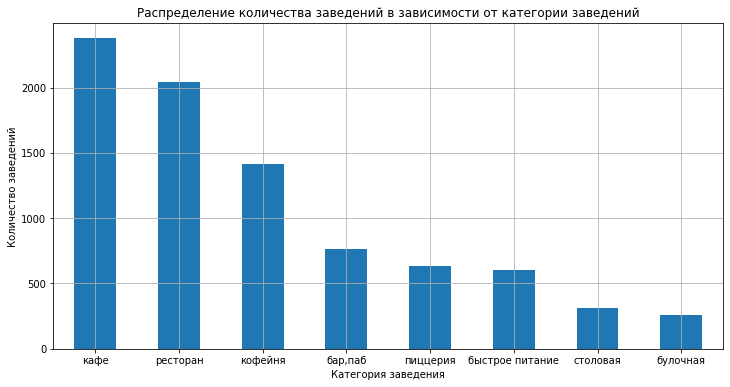

In [33]:
# Строим столбчатую диаграмму

plt.figure(figsize=(12, 6))

df['category'].value_counts().plot(
               kind='bar',
               rot=0,
               legend=False,
               title=f'Распределение количества заведений в зависимости от категории заведений'
)

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Также посмотрим на долю заведений по отношению к общему количеству заведений (в %)

In [34]:
# Проверяем распределение данных по значениям столбца category в %

print('Распределение данных по значениям столбца category в %:')
print()
df['category'].value_counts()/df['category'].count() * 100

Распределение данных по значениям столбца category в %:



кафе               28.289317
ресторан           24.304069
кофейня            16.809422
бар,паб             9.100642
пиццерия            7.530335
быстрое питание     7.173448
столовая            3.747323
булочная            3.045444
Name: category, dtype: float64

Таким образом, мы делаем вывод о том, что наиболее популярными заведениями в г.Москва являются:

- `Кафе` (около 28% от общего количества заведений)
- `Ресторан` (около 24% от общего количества заведений)
- `Кофейня` (около 17% от общего количества заведений)

Совокупность заведений этих трёх категорий составляет около 70% от общего количества заведений в г.Москва

Затем идут заведения, чья доля от общего количества составляет меньше 10%:

- `Бар,паб` (около 9% от общего количества заведений)            
- `Пиццерия` (около 7% от общего количества заведений)           
- `Быстрое питание` (около 7% от общего количества заведений)    

Совокупность заведений этих трёх категорий составляет 23% от общего количества заведений в г.Москва

Наименее популярными являются заведения, чья доля от общего количества составляет от 3 до 4%:

- `Столовая` (около 4% от общего количества заведений)             
- `Булочная` (около 3% от общего количества заведений)

Совокупность заведений этих двух категорий составляет около 7% от общего количества заведений в г.Москва

---

### Задача 2

Для того, чтобы изучить административные районы Москвы, которые представлены в данных, мы построим гистограмму, которая поможет отобразить распределение количества заведений по административным районам Москвы. Перед этим определим количество объектов общественного питания по каждому административному району Москвы с помощью метода `value_counts()`

In [35]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
print()
print(df['district'].value_counts())

Распределение данных по значениям столбца district:

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


Результаты показывают, что всего в этом столбце 9 уникальных значений. Значения коллеблятся в диапазоне от 409 заведений до 2242 заведений в зависимости от административного округа

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `district`:

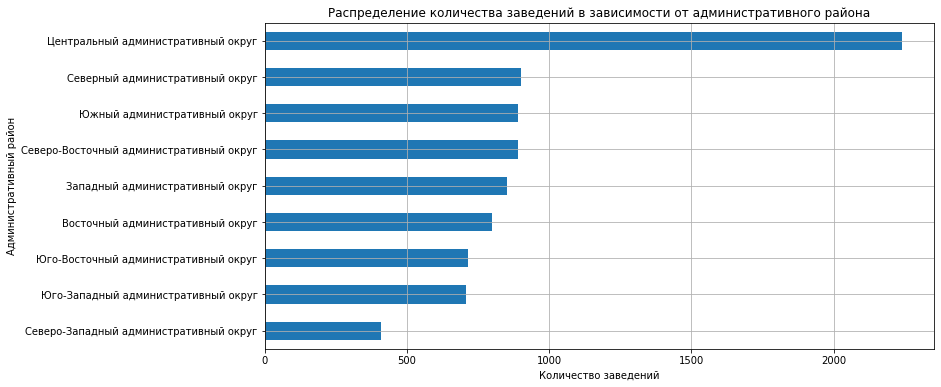

In [36]:
# Строим линейчатую диаграмму

plt.figure(figsize=(12, 6))

df['district'].value_counts().sort_values(ascending = True).plot(
               kind='barh',
               rot=0,
               legend=False,
               title=f'Распределение количества заведений в зависимости от административного района'
)

plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
plt.grid()

plt.show()

Также посмотрим на долю заведений в каждом административном районе по отношению к общему количеству заведений (в %)

In [37]:
# Проверяем распределение данных по значениям столбца dictrict в %
print('Распределение данных по значениям столбца :')
print()
df['district'].value_counts()/df['district'].count() * 100

Распределение данных по значениям столбца :



Центральный административный округ         26.671425
Северный административный округ            10.706638
Южный административный округ               10.611468
Северо-Восточный административный округ    10.599572
Западный административный округ            10.123721
Восточный административный округ            9.493219
Юго-Восточный административный округ        8.493933
Юго-Западный административный округ         8.434452
Северо-Западный административный округ      4.865572
Name: district, dtype: float64

Таким образом, мы делаем вывод о том, что наибольшее количество заведений находится в `Центральном административном округе` (около 27% от общего количества заведений)

Затем идут заведения, чья доля от общего количества составляет около 8-11%:

- `Северный административный округ`
- `Южный административный округ`               
- `Северо-Восточный административный округ`
- `Западный административный округ`
- `Восточный административный округ`       
- `Юго-Восточный административный округ`        
- `Юго-Западный административный округ`

Совокупность заведений в этих четырех административных районах составляет около 70% от общего количества заведений в г.Москва

Наименьшее количество заведений находится в `Северо-западном административном округе` (около 5% от общего количества заведений)

Так как большее количество заведений находится в `Центральном административном округе` (около 27% от общего количества заведений), будет целесообразно исследовать распределение заведений каждой категории в Центральном административном округе Москвы. Результаты можно представить в виде гистограммы.

In [38]:
# Получаем необходимый срез данных и проверяем распределение данных по значениям столбца district

subset = df.loc[df['district'] == 'Центральный административный округ']

print(subset['category'].value_counts())

subset_category_count = subset['category'].count()
print()
print(f'Общее количество заведений в Центральном административном округе: {subset_category_count}')

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

Общее количество заведений в Центральном административном округе: 2242


Результаты показывают, что всего в этом столбце 8 уникальных значений. Значения коллеблятся в диапазоне от 50 заведений до 670 заведений. Общее количество заведений в Центральном административном округе - 2242

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце category:

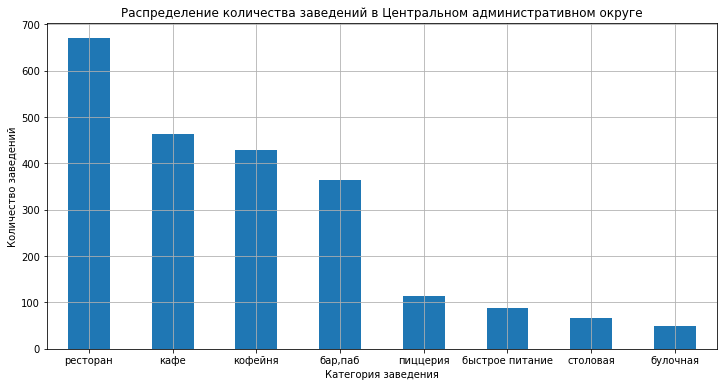

In [39]:
# Строим столбчатую диаграмму

plt.figure(figsize=(12, 6))

subset['category'].value_counts().plot(
               kind='bar',
               rot=0,
               legend=False,
               title=f'Распределение количества заведений в Центральном административном округе'
)

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Также посмотрим на долю заведений в Центральном административном округе по отношению к общему количеству заведений в данном округе (в %)

In [40]:
# Проверяем распределение данных по значениям столбца category в %
print('Распределение данных по значениям столбца category:')
print()
subset['category'].value_counts()/subset['category'].count() * 100

Распределение данных по значениям столбца category:



ресторан           29.884032
кафе               20.695807
кофейня            19.090098
бар,паб            16.235504
пиццерия            5.040143
быстрое питание     3.880464
столовая            2.943800
булочная            2.230152
Name: category, dtype: float64

Таким образом, мы делаем вывод о том, что наиболее популярным заведением в Центральном административном округе является `ресторан` (около 30% от общего количества заведений в данном округе)

Затем идут заведения, чья доля от общего количества составляет от 16 до 21%:

- `Кафе` (около 21% от общего количества заведений в данном округе)
- `Кофейня` (около 19% от общего количества заведений в данном округе)
- `Бар,паб` (около 16% от общего количества заведений в данном округе)

Совокупность заведений этих трёх категорий составляет около 56% от общего количества заведений в данном округе

Наименее популярными являются заведения, чья доля от общего количества составляет от 2 до 5%:

- `Пиццерия` (около 5% от общего количества заведений в данном округе)
- `Быстрое питание` (около 4% от общего количества заведений в данном округе)
- `Столовая` (около 3% от общего количества заведений в данном округе)        
- `Булочная` (около 2% от общего количества заведений в данном округе)

Совокупность заведений этих четырёх категорий составляет около 14% от общего количества заведений в данном округе

---

### Задача 3

Для того, чтобы изучить соотношение сетевых и несетевых заведений, которые представлены в данных, мы построим гистограмму, которая поможет отобразить распределение количества сетевых и несетевых заведений. Перед этим определим количество сетевых и несетевых объектов общественного питания Москвы с помощью метода `value_counts()`

In [41]:
# Проверяем распределение данных по значениям столбца chain
print('Распределение данных по значениям столбца chain:')
print()
print(df['chain'].value_counts())
print()
print('Разница между несетевыми и сетевыми заведениями:')
df['chain'].value_counts()[0] - df['chain'].value_counts()[1]

Распределение данных по значениям столбца chain:

0    5201
1    3205
Name: chain, dtype: int64

Разница между несетевыми и сетевыми заведениями:


1996

Результаты показывают, что всего в этом столбце 2 уникальных значения - `0` (заведение не является сетевым) и `1` (заведение является сетевым). Мы можем наблюдать, что количество несетевых заведений превышает количество сетевых заведений - 5201 несетевых заведений против 3205 сетевых заведений соответственно. Выразим соотношение сетевых и несетевых заведений в %

In [42]:
# Проверяем распределение данных по значениям столбца chain в %
print('Распределение данных по значениям столбца chain:')
print()
chain_prop = df['chain'].value_counts()/df['chain'].count() * 100
print(chain_prop)
print()
print('Разница между несетевыми и сетевыми заведениями в %:')
chain_prop[0] - chain_prop[1]

Распределение данных по значениям столбца chain:

0    61.872472
1    38.127528
Name: chain, dtype: float64

Разница между несетевыми и сетевыми заведениями в %:


23.744944087556497

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `chain`:

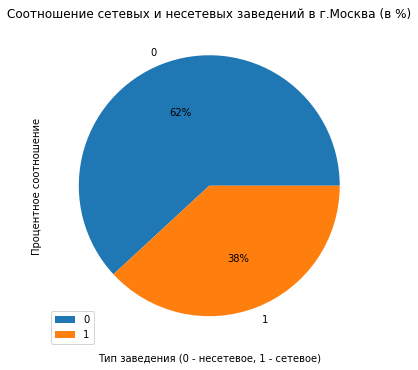

In [43]:
# Строим столбчатую диаграмму

plt.figure(figsize=(8, 6))

chain_prop.plot(
               kind='pie',
               autopct = '%1.0f%%',
               legend=True,
               title=f'Соотношение сетевых и несетевых заведений в г.Москва (в %)'
)

plt.xlabel('Тип заведения (0 - несетевое, 1 - сетевое)')
plt.ylabel('Процентное соотношение')
plt.grid()

plt.show()

Таким образом, мы можем сделать вывод о том, что в г.Москва несетевых заведений на 1996 (на 23%) больше, чем сетевых заведений.

Однако стоит рассмотреть соотношение сетевых и несетевых заведений не только в целом, но и в разрезе каждой категории. Для этого построим столбчатые диаграммы с разделением по признаку `chain` среди всех категорий заведений

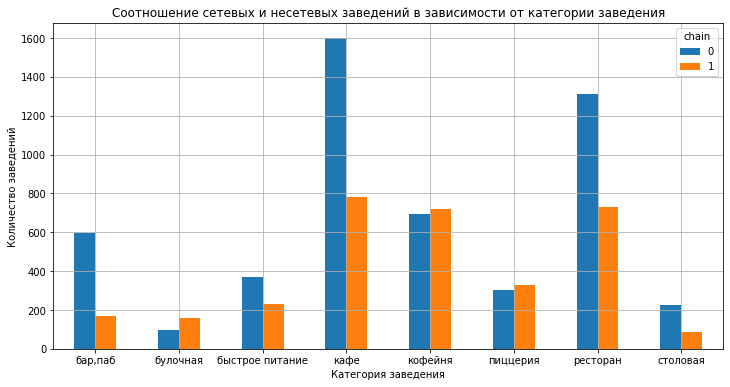

In [44]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Соотношение сетевых и несетевых заведений в зависимости от категории заведения',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()

In [45]:
# Представим соотношение сетевых и несетевых заведений в зависимости от категории заведения в формате таблицы

grouped

chain,0,1
category,,
"бар,паб",596,169
булочная,99,157
быстрое питание,371,232
кафе,1599,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,730
столовая,227,88


In [46]:
# Представим соотношение сетевых и несетевых заведений в зависимости от категории заведения в формате таблицы (в %)

grouped/df['category'].count()*100

chain,0,1
category,,
"бар,паб",7.090174,2.010469
булочная,1.177730,1.867714
быстрое питание,4.413514,2.759933
кафе,19.022127,9.267190
кофейня,8.244111,8.565310
пиццерия,3.604568,3.925767
ресторан,15.619795,8.684273
столовая,2.700452,1.046871


Исходя из построенной визуализации, мы можем сделать следующие выводы:

- Наибольшее количество несетевых заведений характерно для категории заведений `кафе` (1599 заведений) и `ресторан` (1313 заведений)
- Наибольшее количество сетевых заведений характерно для категории заведений `кафе` (779 заведений), `ресторан` (730 заведений) и `кофейня` (720 заведений)
- Наименьшее количество несетевых заведений характерно для категории заведений `булочная` (99 заведений)
- Наименьшее количество сетевых заведений характерно для категории заведений `столовая` (88 заведений)

---

### Задача 4

Для исследования количества посадочных мест `seats` в заведениях необходимо построить диаграмму размаха

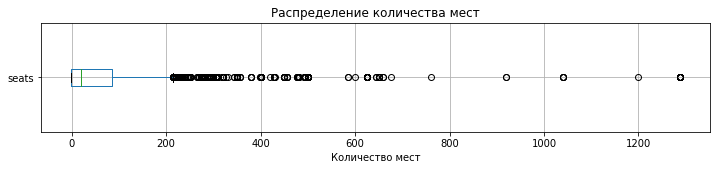

In [47]:
# Построим график диаграммы размаха

plt.figure(figsize=(12, 2))

df.boxplot(column = 'seats', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Сразу обратим внимание на то медиана, нижний квартиль и верхний квартиль сильно смешены влево, поскольку на этапе преобработки данных мы заменили пропуски в стобце `seats` на значения-заглушки (в нашем случае '-1', так как количество мест не может принимать отрицательное значение). Поэтому на этапе исследовательского анализа данных будет корректно исключить эти данные из исследования

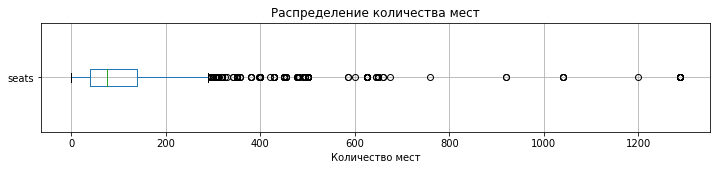

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
80%       160.000000
85%       200.000000
90%       240.000000
95%       307.000000
max      1288.000000
Name: seats, dtype: float64

In [48]:
# Создаём необходимый срез данных и повторно строим диаграмму размаха

subset_seats = df.loc[df['seats'] >= 0]

plt.figure(figsize=(12, 2))

subset_seats.boxplot(column = 'seats', vert = False)

plt.title('Распределение количества мест')
plt.xlabel('Количество мест')

plt.show()
print()
subset_seats['seats'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95])

Распределение значений мест асимметричное, скошенное вправо. Минимальное количество мест — 0, а максимальное — 1288. Среднее значение соответствует 108 местам, тогда как медиана — 75 местам. Среднее и медианное значение недостаточно близки. 25% заведений обладают 40 посадочными местами, 50% заведений - 75 посадочными местами, 75% заведений - 140 посадочными местами. По гистограмме размаха видно, что значения выше примерно 700 мест можно считать аномалиями, поскольку их крайне мало. Их появление может быть связано со специфичностью заведения или технической ошибкой. А значения выше примерно 300 мест можно считать выбросами. 95-перцентиль подтверждает этот факт, поскольку в 95% заведений количество посадочных мест не превышает 307

При анализе данных оставим все значения, поскольку если отбросить группу 300+ мест, то можно исключить из анализа существенное количество заведений общественного питания из конкретной категории

Далее изучим типичное количество посадочных мест для каждой категории заведений. Для этого используем метод `mode()`, который отразит значение, которое встречает в наборе данных наиболее часто

In [49]:
# Выводим типичное количество посадочных мест для каждой категории заведений

subset_seats.groupby('category')['seats'].median().sort_values(ascending = False)

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

Визуализируем типичное количество посадочных мест для каждой категории заведений с помощью столбчатой диаграммы

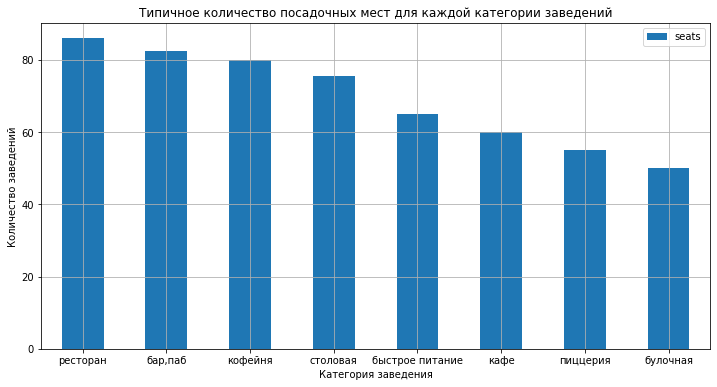

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64


In [50]:
# Построим график столбчатой диаграммы
grouped_subset_seats = subset_seats.groupby('category')['seats'].median().sort_values(ascending = False)
grouped_subset_seats.plot(kind='bar',
               title=f'Типичное количество посадочных мест для каждой категории заведений',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()

print(grouped_subset_seats)

Таким образом, мы можем сделать следующие выводы:
    
- Для категории `ресторан` типичное количество посадочных мест составляет 86
- Для категории `бар, паб` типичное количество посадочных мест составляет 82
- Для категории `кофейня` типичное количество посадочных мест составляет 80
- Для категории `столовая` типичное количество посадочных мест составляет 75
- Для категории `быстрое питание` типичное количество посадочных мест составляет 65
- Для категории `кафе` типичное количество посадочных мест составляет 60
- Для категории `пиццерия` типичное количество посадочных мест составляет 55
- Для категории `булочная` типичное количество посадочных мест составляет 50

---

### Задача 5

Для визуализации распределения средних рейтингов по категориям заведений необходимо произвести группировку по категориям заведений, а среднее значение определять на основе столбца `rating`. Визуализируем данное распределение с помощью столбчатой диаграммы

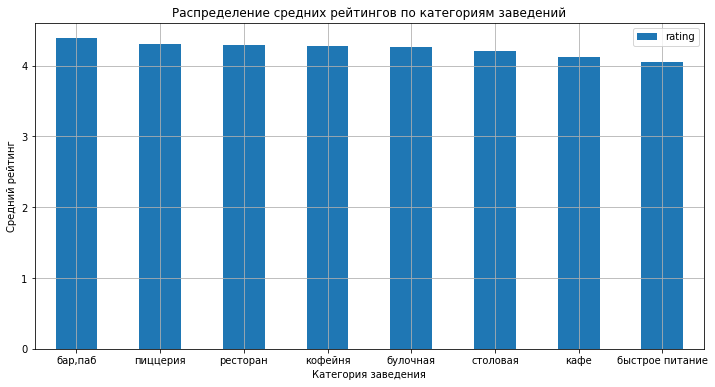

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float64


In [51]:
# Построим график столбчатой диаграммы и представим результаты в табличном формате
grouped_rating = df.groupby('category')['rating'].mean().sort_values(ascending = False)
grouped_rating.plot(kind='bar',
               title=f'Распределение средних рейтингов по категориям заведений',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()

print(grouped_rating)

Таким образом, мы можем сделать вывод о том, что усреднённые рейтинги для разных типов общепита практически не отличаются - значения варьируются от 4.05 (наименьшая усреднённая оценка у категории `быстрое питание`) до 4.38 (наибольшая усреднённая оценка у категории `бар,паб`)

---

### Задача 6

Для определения самой сильной корреляции рейтингов заведений, необходимо построить и визуализировать матрицу корреляции рейтинга заведения с разными данными: категория (`category`), административный район Москвы (`district`), статус сетевого заведения (`rating`), количество мест (`seats`), ценовая категория (`price`) и признак, является ли заведения круглосуточным (`is_24_7`)

Для построения корректной корреляционной матрицы необходимо заменить значения заглушки в столбце `seats` обратно на пропуски. Это позволит учитывать данные в расчётах и избегать искажения результатов анализов. Для этого создадим ещё один срез данных, в котором заменим заглушки на пропуски

In [52]:
# Заменяем заглушки на пропуски и выводим первые строки нового среза данных для проверки внесённых изменений

subset_seats_with_nan = df.replace({'seats': {-1: np.nan}})
subset_seats_with_nan.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,Информация отсутствует,Информация отсутствует,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,Информация отсутствует,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


Теперь мы можем приступить к построению корреляционной матрицы

In [53]:
# Вычисляем корреляционную матрицу с использованием phi_k

correlation_matrix = subset_seats_with_nan[['category', 'district', 'rating', 'seats', 'price', 'is_24_7']].phik_matrix()

correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False) 

interval columns not set, guessing: ['rating', 'seats']


,rating
price,0.281294
district,0.200691
category,0.190003
is_24_7,0.150173
seats,0.000000


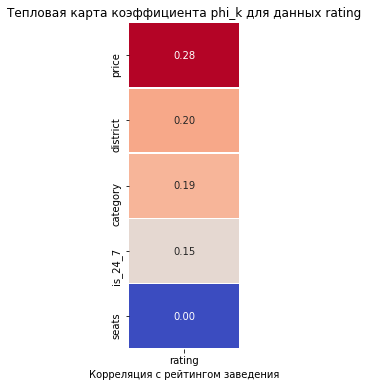

In [54]:
# Визуализируем корреляционную матрицу с использованием phi_k

plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

plt.title('Тепловая карта коэффициента phi_k для данных rating')
plt.xlabel('Корреляция с рейтингом заведения')

plt.show() 

На основе полученной матрицы корреляции, мы можем отметить, что корреляция с показателем количества мест `seats` - не наблюдается, а самая сильная корреляция наблюдается с категорией цен в заведении `price`.

Более детально изучим самую сильную связь - с категорией цен в заведении `price`. Для этого построим столбчатые диаграммы с разделением по признаку `price` среди разных рейтингов, предварительно исключив из датафрейма заведения с неизвестной категорией цен

In [55]:
# Создаём необходимый срез данных

subset_price = df.loc[df['price'] != 'Информация отсутствует']

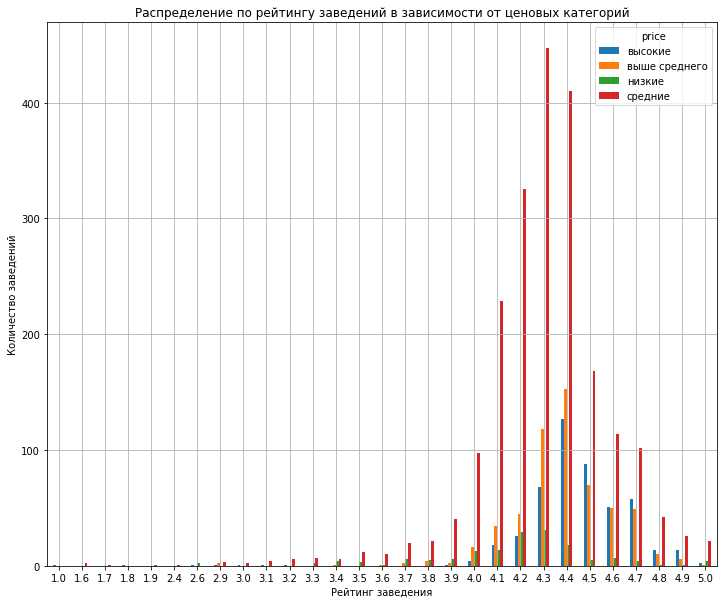

Табличная форма распределения по рейтингу заведений в зависимости от ценовых категорий
price
средние          2117
выше среднего     564
высокие           478
низкие            156
dtype: int64

Табличная форма распределения по рейтингу заведений в зависимости от ценовых категорий в %
price
средние          63.861237
выше среднего    17.013575
высокие          14.419306
низкие            4.705882
dtype: float64


In [56]:
# Построим график столбчатой диаграммы
grouped_corr = subset_price.groupby('rating')['price'].value_counts().unstack(fill_value=0)
grouped_corr.plot(kind='bar',
               title=f'Распределение по рейтингу заведений в зависимости от ценовых категорий',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Рейтинг заведения',
               rot=0,
               figsize=(12, 10))
plt.grid()

# Выводим график
plt.show()

print('Табличная форма распределения по рейтингу заведений в зависимости от ценовых категорий')
print(grouped_corr.sum().sort_values(ascending = False))
print()
print('Табличная форма распределения по рейтингу заведений в зависимости от ценовых категорий в %')
print(grouped_corr.sum().sort_values(ascending = False)/subset_price['price'].count()*100)

На основе полученной диаграммы, мы можем заметить, что при различных оценках заведений в большей степени распространена `средняя` ценовая политика (около 64% от общего количества заведений с известной ценовой политикой). Категория цен `низкие` слабо распространена при различных оценках заведений (около 5% от общего количества заведений с известной ценовой политикой)

---

### Задача 7

Для составления топ-15 популярных сетей в Москве, необходимо сгруппировать данные по названиям заведений. Важно учесть тот факт, что при составлении рейтинга будут использовать только сетевые заведения с показателем `chain = 1`

In [57]:
# Фильтруем и группируем данные по названиям заведений

df_chain_1 = df.loc[df['chain'] == 1]

top = df_chain_1.groupby(['name', 'category']).agg(count = ('name', 'count'), mean = ('rating', 'mean'))
top15 = top.sort_values(by = 'count', ascending = False).head(15)
print('Топ-15 популярных сетей в Москве по количеству заведений:')
print()
display(top15)
print()
top15_count = top15['count'].sum()
print(f'Суммарное количество заведений, входящих в топ-15 популярных сетей в Москве: {top15_count}')

Топ-15 популярных сетей в Москве по количеству заведений:



,,count,mean
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872



Суммарное количество заведений, входящих в топ-15 популярных сетей в Москве: 768


Визуализируем составленный топ-15 популярных сетей в Москве с помощью столбчатых диаграмм. На первой диаграмме отобразим количество заведений, которые входят в топ-15 популярных сетей в Москве

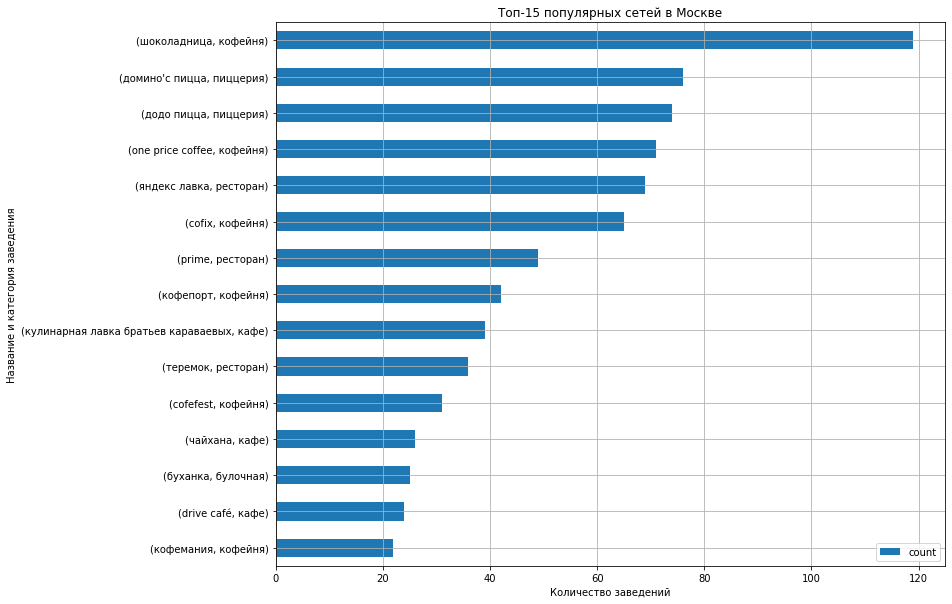

In [58]:
# Построим график столбчатой диаграммы с информацией о количестве заведений

top15['count'].sort_values(ascending = True).plot(kind='barh',
               title=f'Топ-15 популярных сетей в Москве',
               legend=True,
               rot=0,
               figsize=(12, 10))

plt.xlabel('Количество заведений')
plt.ylabel('Название и категория заведения')
plt.grid()

plt.show()

На второй диаграмме отобразим рейтинг заведений, которые входят в топ-15 популярных сетей в Москве

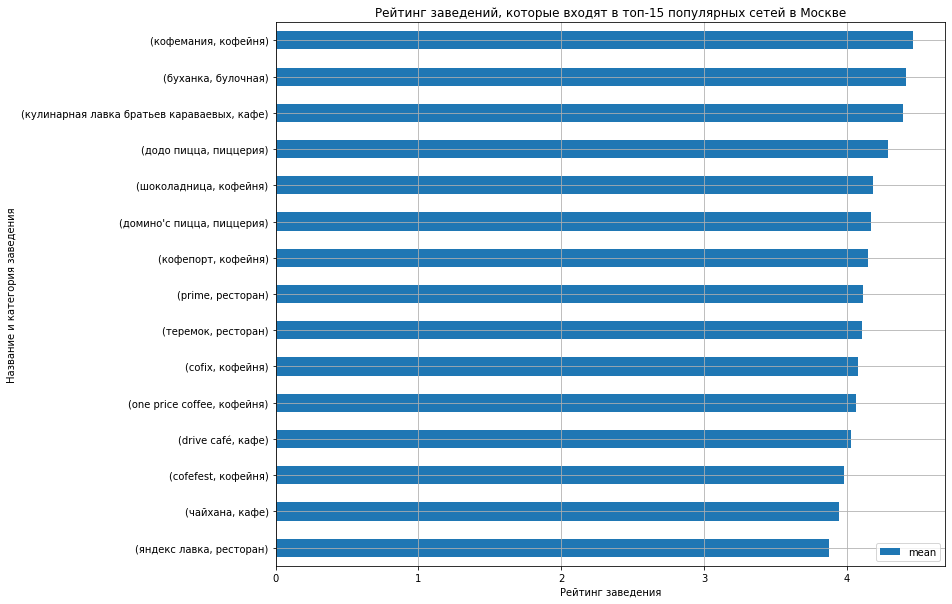

In [59]:
# Построим график столбчатой диаграммы с информацией о рейтинге заведений

top15['mean'].sort_values(ascending = True).plot(kind='barh',
               title=f'Рейтинг заведений, которые входят в топ-15 популярных сетей в Москве',
               legend=True,
               rot=0,
               figsize=(12, 10))

plt.xlabel('Рейтинг заведения')
plt.ylabel('Название и категория заведения')
plt.grid()

plt.show()

На основе полученных таблицы и визуализаций мы можем сделать следующие выводы:

- Топ-15 популярных сетей в Москве включает в себя 768 заведений
- Количество заведений колеблется от 22 до 119
- Средняя оценка колеблется от 3.87 до 4.46
- Данные заведения относятся к следующим категориям:
    - `Кофейня` (6 заведений)
    - `Ресторан` (3 заведения)
    - `Кафе` (3 заведения)
    - `Пиццерия` (2 заведения)
    - `Булочная` (1 заведение)

---

### Задача 8

Для того, чтобы изучить вариацию среднего чека заведения `middle_avg_bill` в зависимости от района Москвы, мы построим гистограмму, которая поможет отобразить размер среднего чека в каждом административном районе. Перед этим определим размер среднего чека в каждом административном районе

In [60]:
# Определяем размер среднего чека в каждом административном районе

grouped_middle_avg_bill = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False)
print('Размер среднего чека в зависимости от административного района Москвы')
print()
print(grouped_middle_avg_bill)

Размер среднего чека в зависимости от административного района Москвы

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64


Мы видим, что наибольший размер среднего чека характерен для `Центрального административного округа` (1191 рублей), а наименьший размер среднего чека характерен для `Юго-Восточного административного округа` (654 рубля)

Визуализируем полученные данные с помощью столбчатых диаграмм

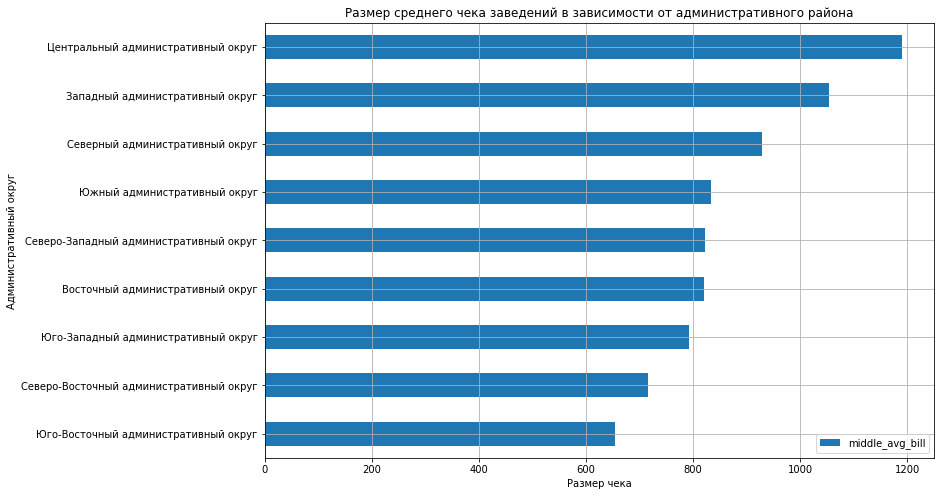

In [61]:
# Построим график столбчатой диаграммы

grouped_middle_avg_bill.sort_values(ascending = True).plot(kind='barh',
               title=f'Размер среднего чека заведений в зависимости от административного района',
               legend=True,
               rot=0,
               figsize=(12, 8))

plt.xlabel('Размер чека')
plt.ylabel('Административный округ')
plt.grid()

plt.show()

На основе полученных таблицы и визуализаций мы можем сделать вывод о том, что удалённость от центра не влияет на цены в заведениях. То есть, цены в заведениях различных административных районов не имеют прямой или обратной зависимости от удалённости от центра. При формулировке вывода было использовано следующее распределение административных округов Москвы по удалённости от Центрального административного округа, начиная от ближайших к наиболее удалённым:

`1. Северный административный округ` - 927 рублей

`2. Северо-Восточный административный округ` - 716 рублей

`3. Восточный административный округ` - 820 рублей

`4. Юго-Восточный административный округ` - 654 рубля

`5. Южный административный округ`- 834 рубля

`6. Юго-Западный административный округ` - 792 рубля

`7. Западный административный округ` - 1053 рубля

`8. Северо-Западный административный округ` - 822 рубля  

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

На основе проделанного исследовательского анализа данных можно сделать следующие промежуточные выводы:

- Наиболее популярными заведениями в г.Москва являются `кафе` (2378 заведений - около 28% от общего количества заведений) и `ресторан` (2043 заведения - около 24% от общего количества заведений)

- Наименее популярными заведениями в г.Москва являются `столовая` (315 заведений - около 4% от общего количества заведений) и `булочная` (256 заведения - около 3% от общего количества заведений)

- Наибольшее количество заведений находится в `Центральном административном округе` (2242 заведения - около 27% от общего количества заведений)

- Наименьшее количество заведений находится в `Северо-Западном административном округе` (409 заведений - около 5% от общего количества заведений)

- Наиболее популярнымы заведениями в `Центральном административном округе` являются `ресторан` (670 заведений - около 30% от общего количества заведений в данном округе) и `кафе` (464 заведения - около 21% от общего количества заведений в данном округе)

- Наименее популярными заведениями в `Центральном административном округе` являются `столовая` (66 заведений - около 3% от общего количества заведений в данном округе) и `булочная` (50 заведений - около 2% от общего количества заведений в данном округе)

- В Москве в большей степени распространены несетевые заведения (5201 несетевых заведений - около 62% от общего количества заведений) и в меньшей степени распространены сетевые заведения (3205 несетевых заведений - около 38% от общего количества заведений)

- Наибольшее количество несетевых заведений характерно для категории заведений `кафе` (1599 заведений) и `ресторан` (1313 заведений)

- Наибольшее количество сетевых заведений характерно для категории заведений `кафе` (779 заведений), `ресторан` (730 заведений) и `кофейня` (720 заведений)

- Наименьшее количество несетевых заведений характерно для категории заведений `булочная` (99 заведений)

- Наименьшее количество сетевых заведений характерно для категории заведений `столовая` (88 заведений)

- Среднее количество посадочных мест в заведедениях - 108

- У 95% заведений количество посадочных мест не превышает 307 мест

- Для категории `ресторан` типичное количество посадочных мест составляет 86, для категории `бар, паб` - 82, для категории `кофейня` - 80, для категории `столовая` - 75, для категории `быстрое питание` - 65, для категории `кафе` - 60, для категории `пиццерия` - 55, для категории `булочная` - 50

- Усреднённые рейтинги для разных типов общепита практически не отличаются - значения варьируются от 4.05 (наименьшая усреднённая оценка у категории `быстрое питание`) до 4.38 (наибольшая усреднённая оценка у категории `бар, паб`)

- Самая сильная корреляция рейтинга заведения `rating` наблюдается с категорией цен в заведении `price` (коэффициент phi_k = 0.28)

- При различных оценках заведений в большей степени распространена *средняя* ценовая политика (около 64% от общего количества заведений с известной ценовой политикой)

- Категория цен *низкие* слабо распространена при различных оценках заведений (около 5% от общего количества заведений с известной ценовой политикой)

- Топ-15 популярных сетей в Москве включает в себя 768 заведений. Их средняя оценка колеблется от 3.87 до 4.46. Самой популярной сетью заведений в Москве является `шоколадница` со средней оценкой 4.17. Наиболее часто встречаемая категория заведений в данном топ-15 - `кофейня`

- Наибольший размер среднего чека характерен для `Центрального административного округа` (1191 рублей)

- Наименьший размер среднего чека характерен для `Юго-Восточного административного округа` (654 рубля)

- Удалённость от центра не влияет на цены в заведениях

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

### Общий обзор проделанной работы.

Для исследовательского анализа рынка заведений общественного питания (г. Москва) были использованы датасеты с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года и с информацией о среднем чеке в заведениях общественного питания

В результате преобработки данных пропущенные значения, дубликаты и прочие необработанные данные приведены в корректный формат, соответствующий специфике предоставленных данных.

Для полноценного анализа данных был добавлен новый столбец `is_24_7`, который показывал, работает ли заведение ежедневно и круглосуточно или нет (в формате булевого значения - True или False)

### Ответы на исследовательские вопросы:

**1. Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.**

В данных представлено 8 категорий заведений (справа от названий указано количество объектов общественного питания по каждой категории):

- `кафе` - 2378 заведений (около 28% от общего количества заведений)
- `ресторан` - 2043 заведения (около 24% от общего количества заведений)
- `кофейня` - 1413 заведений (около 17% от общего количества заведений)
- `бар,паб` - 765 заведений (около 9% от общего количества заведений)
- `пиццерия` - 633 заведения (около 7% от общего количества заведений)
- `быстрое питание` - 603 заведения (около 7% от общего количества заведений)
- `столовая` - 315 заведений (около 4% от общего количества заведений)
- `булочная` - 256 заведений (около 3% от общего количества заведений)

**2. Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.**

В данных присутствуют 9 административных районов Москвы (справа от названий указано количество объектов общественного питания по каждому административному району Москвы):

- `Центральный административный округ` - 2242 заведения (около 27% от общего количества заведений)
- `Северный административный округ` - 900 заведений (около 10% от общего количества заведений)
- `Южный административный округ` - 892 заведения (около 10% от общего количества заведений)
- `Северо-Восточный административный округ` - 891 заведение (около 10% от общего количества заведений)
- `Западный административный округ` - 851 заведение (около 10% от общего количества заведений)
- `Восточный административный округ` - 798 заведений (около 9% от общего количества заведений)
- `Юго-Восточный административный округ` - 714 заведений (около 8% от общего количества заведений)
- `Юго-Западный административный округ` - 709 заведений (около 8% от общего количества заведений)
- `Северо-Западный административный округ` - 409 заведений (около 5% от общего количества заведений)

Распределение заведений каждой категории в Центральном административном округе Москвы (справа от названий указано количество объектов общественного питания по каждой категории заведений в данном административном районе):

- `ресторан` - 670 заведений (около 30% от общего количества заведений в данном округе)
- `кафе` - 464 заведения (около 21% от общего количества заведений в данном округе)
- `кофейня` - 428 заведений (около 19% от общего количества заведений в данном округе)
- `бар,паб` - 364 заведения (около 16% от общего количества заведений в данном округе)
- `пиццерия` - 113 заведений (около 5% от общего количества заведений в данном округе)
- `быстрое питание` - 87 заведений (около 4% от общего количества заведений в данном округе)
- `столовая` - 66 заведений (около 3% от общего количества заведений в данном округе)
- `булочная` - 50 заведений (около 2% от общего количества заведений в данном округе)

**3. Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.**

Соотношение сетевых и несетевых заведений в целом:

- 5201 несетевых заведений (около 62% от общего числа заведений)
- 3205 сетевых заведений (около 38% от общего числа заведений)

Соотношение сетевых и несетевых заведений в разрезе категорий заведений:

    Категория	Количество несетевых заведений Количество сетевых заведений
    
    бар,паб	                        596	                        169
    булочная	                        99	                        157
    быстрое питание	                371	                        232
    кафе	                          1599	                        779
    кофейня	                        693	                        720
    пиццерия	                       303	                        330
    ресторан	                      1313	                        730
    столовая	                       227	                         88

Наибольшее количество сетевых заведений характерно для категории заведений `кафе` (779 заведений), `ресторан` (730 заведений) и `кофейня` (720 заведений)

**4. Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.**

Значения выше примерно 700 мест можно считать аномалиями, поскольку их крайне мало. Их появление может быть связано со специфичностью заведения или технической ошибкой. А значения выше примерно 300 мест можно считать выбросами. 95-перцентиль подтверждает этот факт, поскольку в 95% заведений количество посадочных мест не превышает 307

Типичное количество посадочных мест для каждой категории заведений:

- Для категории `ресторан` типичное количество посадочных мест составляет 86
- Для категории `бар, паб` типичное количество посадочных мест составляет 82
- Для категории `кофейня` типичное количество посадочных мест составляет 80
- Для категории `столовая` типичное количество посадочных мест составляет 75
- Для категории `быстрое питание` типичное количество посадочных мест составляет 65
- Для категории `кафе` типичное количество посадочных мест составляет 60
- Для категории `пиццерия` типичное количество посадочных мест составляет 55
- Для категории `булочная` типичное количество посадочных мест составляет 50

**5. Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?**

Распределение средних рейтингов по категориям заведений:

    Категория           Средний рейтинг
    
    бар,паб            4.387712
    пиццерия           4.301264
    ресторан           4.290357
    кофейня            4.277282
    булочная           4.268359
    столовая           4.211429
    кафе               4.123886
    быстрое питание    4.050249

Усреднённые рейтинги для разных типов общепита практически не отличаются - значения варьируются от 4.05 (наименьшая усреднённая оценка у категории `быстрое питание`) до 4.38 (наибольшая усреднённая оценка у категории `бар, паб`)

**6. Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.**

Матрица корреляции:

                rating
            
    price	   0.281294
    district	0.200691
    category	0.190003
    is_24_7	 0.150173
    seats	   0.000000

На основе полученной матрицы корреляции, мы отметили, что корреляция с показателем количества мест `seats` - не наблюдается, а самая сильная корреляция наблюдается с категорией цен в заведении `price`.

При детальном изучении самой сильной связи с категорией цен в заведении `price`, мы выявили, что при различных оценках заведений в большей степени распространена `средняя` ценовая политика (около 64% от общего количества заведений с известной ценовой политикой). Категория цен `низкие` слабо распространена при различных оценках заведений (около 5% от общего количества заведений с известной ценовой политикой)

**7. Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.**

Топ-15 популярных сетей в Москве по количеству заведений:
                                                 
       Название                           Категория  Количество   Средний рейтинг
          
    1. шоколадница                          кофейня      119         4.178151
    2. домино'с пицца                       пиццерия      76         4.169737
    3. додо пицца                           пиццерия      74         4.286486
    4. one price coffee                     кофейня       71         4.064789
    5. яндекс лавка                         ресторан      69         3.872464
    6. cofix                                кофейня       65         4.075385
    7. prime                                ресторан      49         4.114286
    8. кофепорт                             кофейня       42         4.147619
    9. кулинарная лавка братьев караваевых  кафе          39         4.394872
    10. теремок                             ресторан      36         4.105556
    11. cofefest                            кофейня       31         3.977419
    12. чайхана                             кафе          26         3.946154
    13. буханка                             булочная      25         4.416000
    14. drive café                          кафе          24         4.025000
    15. кофемания                           кофейня       22         4.463636
    
Топ-15 популярных сетей в Москве включает в себя 768 заведений

Количество заведений колеблется от 22 до 119

Средняя оценка колеблется от 3.87 до 4.46

Данные заведения относятся к следующим категориям:
- Кофейня (6 заведений)
- Ресторан (3 заведения)
- Кафе (3 заведения)
- Пиццерия (2 заведения)
- Булочная (1 заведение)

**8. Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.**

Вариация среднего чека заведения в зависимости от района Москвы:

    Административный район                     Размер среднего чека
    
    Центральный административный округ         1191.057547
    Западный административный округ            1053.225490
    Северный административный округ             927.959627
    Южный административный округ                834.398089
    Северо-Западный административный округ      822.222930
    Восточный административный округ            820.626923
    Юго-Западный административный округ         792.561702
    Северо-Восточный административный округ     716.611296
    Юго-Восточный административный округ        654.097938
    
Наибольший размер среднего чека характерен для `Центрального административного округа` (1191 рублей), а наименьший размер среднего чека характерен для `Юго-Восточного административного округа` (654 рубля)

Удалённость от центра не влияет на цены в заведениях. То есть, цены в заведениях различных административных районов не имеют прямой или обратной зависимости от удалённости от центра.

### Рекомендации на основе анализа данных

В качестве рекомендаций стоит обратить внимание на следующие моменты:

- Категории заведений `ресторан` и `кафе` являются наиболее популярными и востребованными в г.Москва

- Несетевые заведения пользуются большим спросом по сравнению с сетевыми заведениями. Однако если заказчик предпочитает открыть сетевое заведение, то стоит обратить внимание на `кофейни`. Составление топ-15 популярных сетей в Москве по количеству заведений показало, что среди сетевых заведений сильно распространены именно кофейни

- Количество посадочных мест не должно превышать `300`

- На рейтинг заведений в большей степени влияет категория цен в заведении. Наиболее предпочтительная категория цен - `средняя`

- Каждый административный район Москвы обладает индивидуальным размером среднего чека (от 650 до 1200 рублей). При этом удалённость от центра не влияет на цены в заведениях